# </font> <font color = #4854E8> RANDOM FOREST REGRESSOR </font>

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model

<b> Data Information </b>

<b>Montreal bike lanes:</b> The dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2015. <br>

https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes

<b> Importing the Libaries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore") 

<b> Importing the dataset </b>

In [2]:
df = pd.read_csv('comptagesvelo2015.csv')

In [3]:
df.head()

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


<b> Data Summery and Visulaization </b>

In [4]:
print(f'The number of columns :{df.shape[0]}')
print(f'The number of rows    :{df.shape[1]}')

The number of columns :319
The number of rows    :23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         319 non-null    object 
 1   Unnamed: 1                   319 non-null    object 
 2   Berri1                       319 non-null    int64  
 3   Boyer                        319 non-null    int64  
 4   Brébeuf                      319 non-null    int64  
 5   CSC (Côte Sainte-Catherine)  319 non-null    int64  
 6   Maisonneuve_1                62 non-null     float64
 7   Maisonneuve_2                319 non-null    int64  
 8   Maisonneuve_3                319 non-null    int64  
 9   Notre-Dame                   319 non-null    int64  
 10  Parc                         319 non-null    int64  
 11  Parc U-Zelt Test             52 non-null     float64
 12  PierDup                      319 non-null    int64  
 13  Pont_Jacques_Cartier

In [6]:
df.describe()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,Parc U-Zelt Test,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
count,319.000000,319.000000,319.000000,319.000000,62.000000,319.000000,319.000000,319.000000,319.000000,52.000000,...,209.000000,319.000000,319.000000,319.000000,319.000000,50.000000,319.000000,319.000000,319.000000,319.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,89.935484,2208.031348,1011.175549,1137.316614,1754.257053,2090.250000,...,2164.578947,2207.626959,2939.294671,1477.206897,207.476489,4563.180000,1387.119122,1903.363636,2023.708464,295.347962
std,2276.281648,1832.808709,2337.531344,960.020397,51.886974,2452.475658,917.450049,991.065590,1415.004315,972.740577,...,1049.224968,1660.936427,2105.774880,1254.990855,231.009131,1667.554469,1070.781272,1376.375755,1632.368428,248.947624
min,10.000000,0.000000,0.000000,0.000000,10.000000,2.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1554.000000,0.000000,20.000000,6.000000,0.000000
25%,387.500000,3.500000,33.000000,54.500000,46.500000,214.500000,119.000000,25.500000,61.000000,1275.000000,...,1221.000000,324.500000,513.000000,159.500000,15.500000,3097.250000,244.500000,457.000000,352.500000,47.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,85.000000,689.000000,1049.000000,1067.000000,1787.000000,2258.000000,...,2349.000000,2361.000000,3169.000000,1422.000000,107.000000,4825.500000,1519.000000,1855.000000,1762.000000,267.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,131.500000,4114.500000,1675.000000,2094.500000,3025.500000,2775.500000,...,2966.000000,3658.000000,4797.000000,2676.000000,337.000000,5957.750000,2237.000000,3111.000000,3539.000000,526.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,207.000000,7905.000000,9999.000000,3035.000000,4867.000000,3997.000000,...,6014.000000,7921.000000,7695.000000,4118.000000,781.000000,7388.000000,4342.000000,5166.000000,5596.000000,820.000000


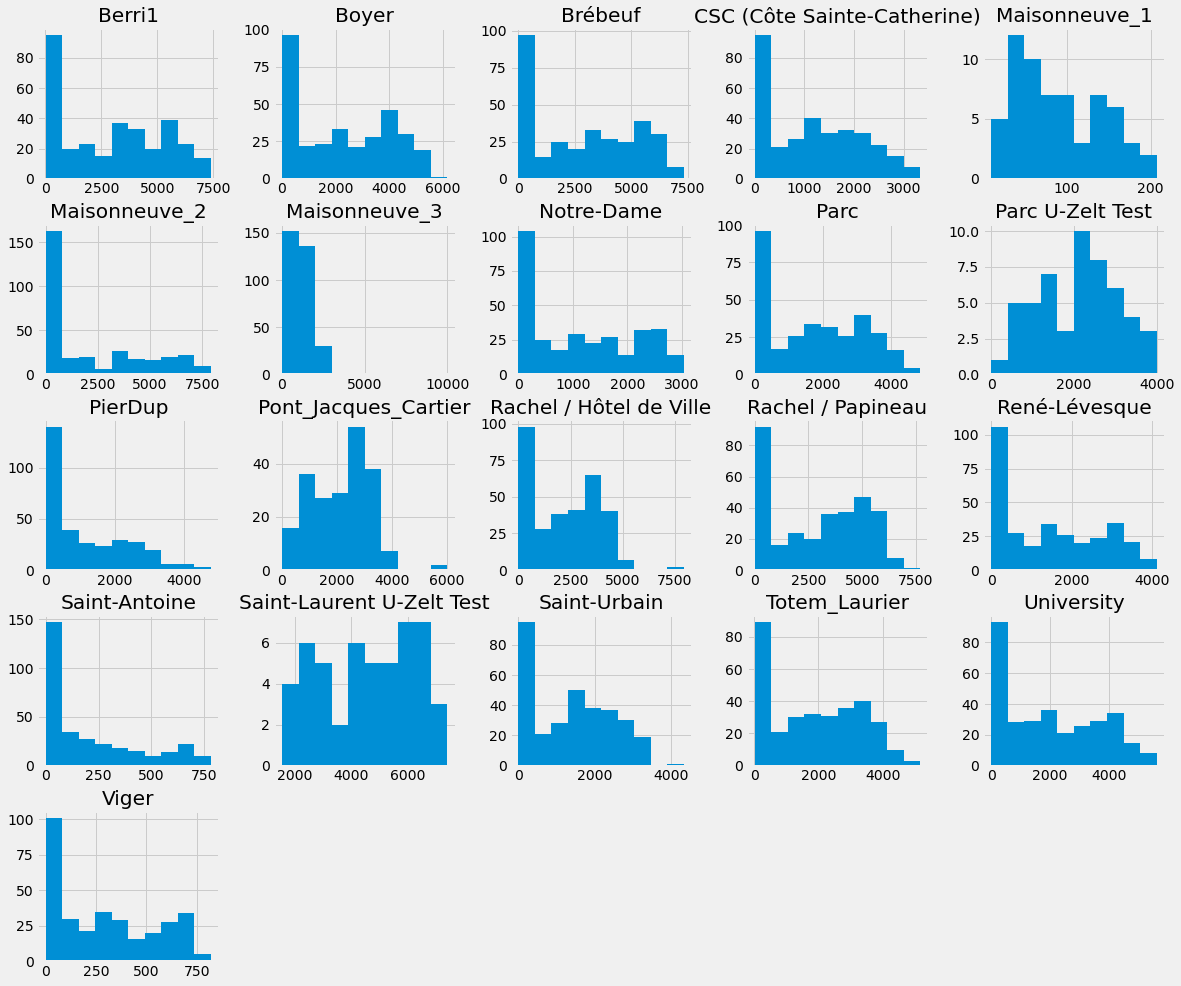

In [7]:
df.hist(figsize=(18,16))
plt.show()

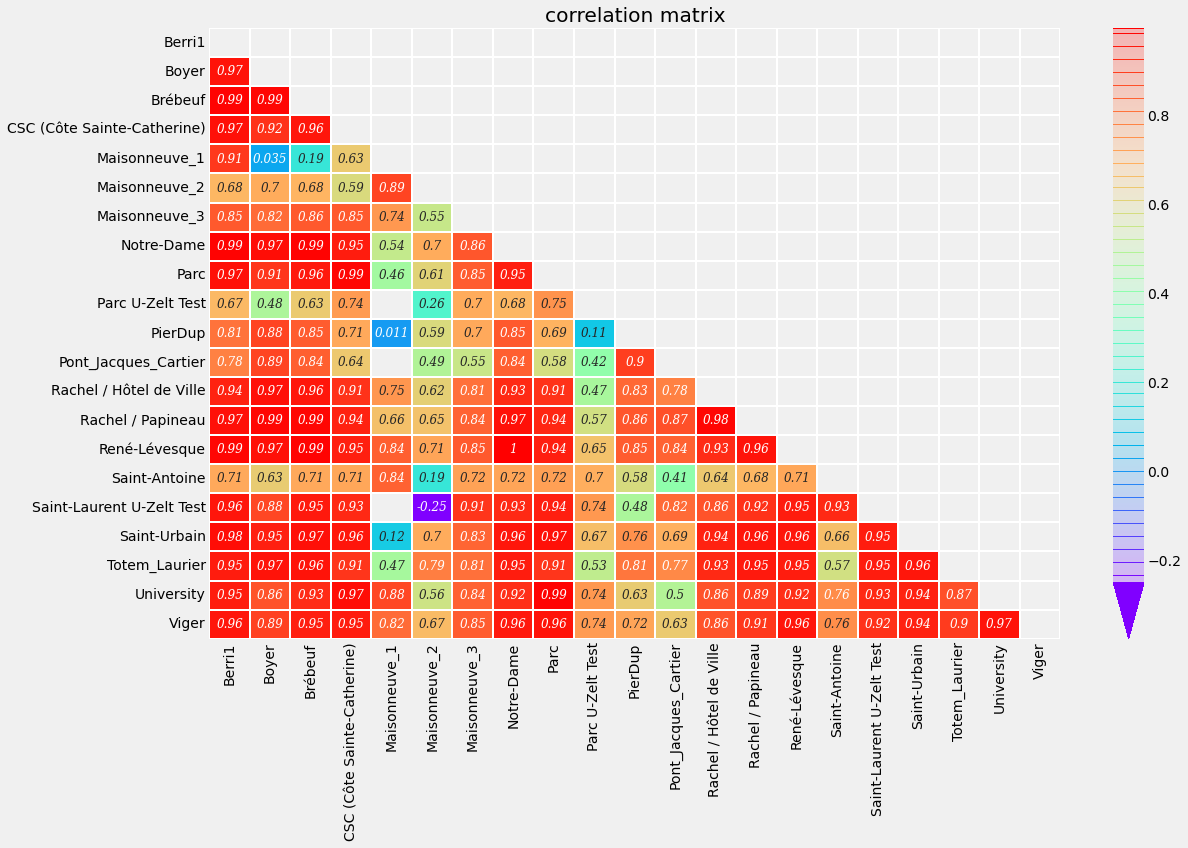

In [8]:
plt.figure(figsize=(18,12))
annot_kws = {'fontsize':12, 'fontstyle':'italic', 'fontfamily':'serif','alpha':1}
cbar_kws = {'shrink':1, 'extend':'min', 'extendfrac':0.1, 'drawedges':True}
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, annot=True, cmap='rainbow', linewidth=0.2, annot_kws=annot_kws, cbar_kws=cbar_kws)
plt.title('correlation matrix')
plt.tight_layout()

<b> Data Preprocessing </b>

In [9]:
df.isnull().sum()

Date                             0
Unnamed: 1                       0
Berri1                           0
Boyer                            0
Brébeuf                          0
CSC (Côte Sainte-Catherine)      0
Maisonneuve_1                  257
Maisonneuve_2                    0
Maisonneuve_3                    0
Notre-Dame                       0
Parc                             0
Parc U-Zelt Test               267
PierDup                          0
Pont_Jacques_Cartier           110
Rachel / Hôtel de Ville          0
Rachel / Papineau                0
René-Lévesque                    0
Saint-Antoine                    0
Saint-Laurent U-Zelt Test      269
Saint-Urbain                     0
Totem_Laurier                    0
University                       0
Viger                            0
dtype: int64

There are some columns with lot of missing values, it is better to delete those columns instead of mean or median imputation because lot of columns are missing
Also deleting the unwanted columns

In [10]:
df = df.drop(['Date', 'Unnamed: 1', 'Maisonneuve_1', 'Parc U-Zelt Test', 'Pont_Jacques_Cartier', 'Saint-Laurent U-Zelt Test'],axis=1)

In [11]:
df.head()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
0,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6
1,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4
2,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5
3,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6,0
4,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56,10


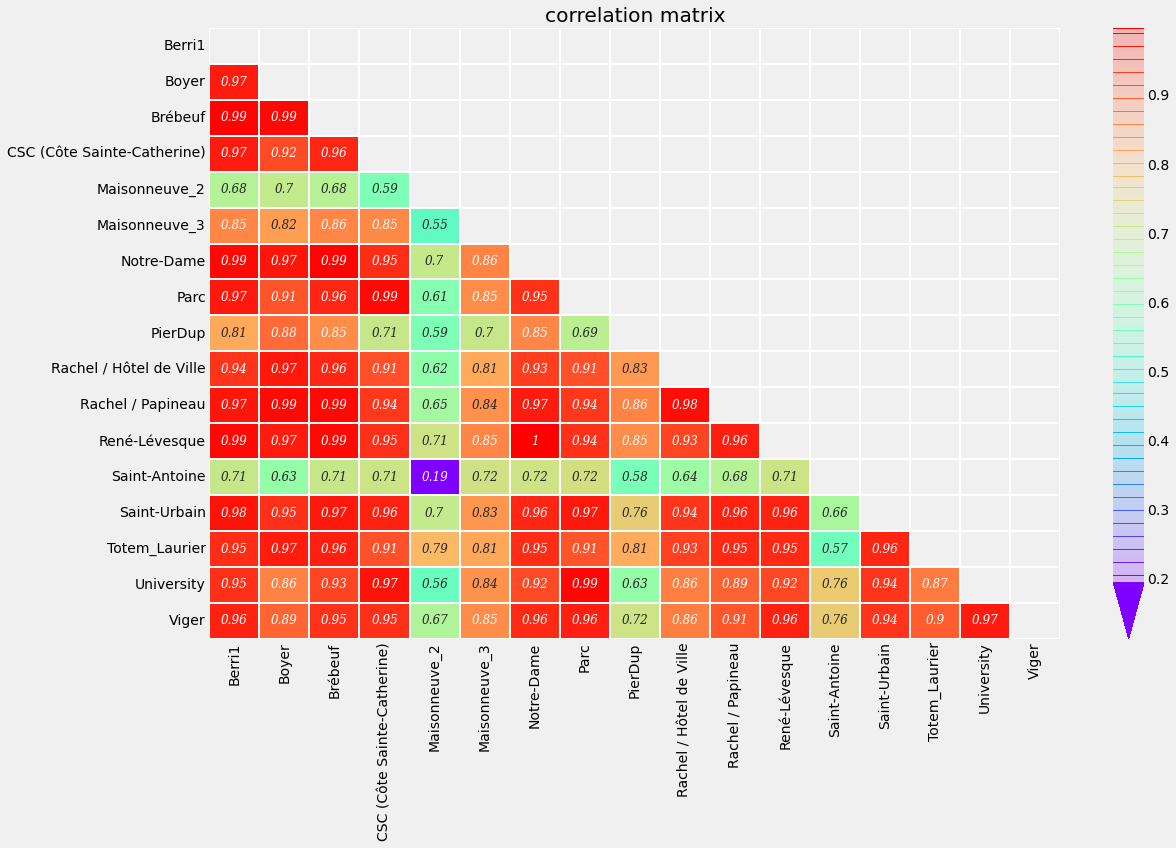

In [12]:
plt.figure(figsize=(18,12))
annot_kws = {'fontsize':12, 'fontstyle':'italic', 'fontfamily':'serif','alpha':1}
cbar_kws = {'shrink':1, 'extend':'min', 'extendfrac':0.1, 'drawedges':True}
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, annot=True, cmap='rainbow', linewidth=0.2, annot_kws=annot_kws, cbar_kws=cbar_kws)
plt.title('correlation matrix')
plt.tight_layout()

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X.head()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University
0,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21
1,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77
2,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40
3,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6
4,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56


In [15]:
y.head()

0     6
1     4
2     5
3     0
4    10
Name: Viger, dtype: int64

<b> Spliting the data into train and test </b>

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (255, 16)
y_train (255,)
X_test (64, 16)
y_test (64,)


In [18]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.060636,-0.159104,-0.014851,0.240844,0.541863,0.786309,0.004470,0.422176,-0.561043,0.067486,0.158896,-0.213196,0.593231,0.132740,-0.294324,0.525063
1,1.024832,0.553134,0.825138,0.877210,-0.827778,0.937950,0.646347,1.215117,0.130109,0.916626,0.855583,0.609161,1.612866,1.041049,0.530181,1.445084
2,-1.226904,-1.227461,-1.246079,-1.236549,-0.807475,-1.033382,-1.146623,-1.225868,-0.934595,-1.350608,-1.334837,-1.166164,-0.803225,-1.329324,-1.343228,-1.187496
3,-1.262383,-1.230234,-1.244337,-1.236549,-0.864324,-1.055807,-1.155807,-1.264901,-0.937886,-1.297882,-1.342110,-1.162133,-0.843124,-1.274044,-1.169994,-1.238364
4,0.419010,0.359543,0.494458,0.401801,1.042535,0.399731,0.531034,0.518312,0.202515,0.374035,0.396943,0.572881,0.992218,0.927630,0.564535,0.659455


<b> Buliding the Random Forest Regressor </b>

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
regressor = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=0)

In [21]:
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=0)

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
y_pred

array([384.5037049 , 536.15025266,  18.89187566,  18.89187566,
       428.50362603,  18.89187566, 599.90826624, 615.61198971,
       259.82342959, 688.50130574,  18.89187566, 330.7879147 ,
       672.85989915, 205.64049996, 278.28241231,  18.89187566,
       388.78922571, 474.76381486,  18.89187566,  18.89187566,
       417.73363764, 267.70785007, 380.71325705, 683.02000861,
       664.40379473, 177.34278912, 282.57346301,  18.89187566,
        18.89187566, 324.53153715, 668.3792888 ,  18.89187566,
       521.7055838 ,  18.89187566,  18.89187566, 361.53845744,
        18.89187566, 175.63563294,  74.00911049, 259.82342959,
       669.88509186,  95.59182051,  18.89187566, 566.57134311,
       612.15232056,  95.59182051, 553.5718242 , 607.15588529,
        18.89187566,  18.89187566, 383.16560821,  74.00911049,
       599.90826624,  18.89187566, 629.76921399, 664.40379473,
        18.89187566,  99.2314796 , 280.24130489,  18.89187566,
        18.89187566,  18.89187566, 546.89806202, 668.37

<b> Evaluate the Result </b>

In this part, we evaluate the Linear Regression Model. And for evaluation we will use three metrics. <br>

`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>

`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>

`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_pred,y_test)
print('r square error :',r2)
mean_square = mean_squared_error(y_pred,y_test)
print('mean squared error :',mean_square)
mean_absolute = mean_absolute_error(y_pred,y_test)
print('mean absolute error :',mean_absolute)

r square error : 0.9646436399885321
mean squared error : 2216.57991072853
mean absolute error : 36.1551857859895
